# First Analysis, Bangladesh Famine Data
Zeel Thakkar, Sept 15th 2020  

Guiding Question: explore the data; look for preliminary differences 

# imports

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

# read in data

In [166]:
betas = pd.read_csv("~/Desktop/research/beta_normalised_bmiq_csv.csv") 
betas

,Unnamed: 0,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C405,C406,C410_rep,C410,C411_rep,C411,C413_rep,C413,C414,C418
0,cg00000957,0.895048,0.880495,0.883519,0.871774,0.880974,0.848459,0.869477,0.910707,0.863935,...,0.877282,0.892543,0.877662,0.862457,0.865530,0.871169,0.874302,0.869468,0.889944,0.875260
1,cg00001349,0.712681,0.828745,0.783386,0.796415,0.829997,0.715184,0.827223,0.829003,0.821132,...,0.802155,0.797717,0.849145,0.865103,0.824336,0.840920,0.736887,0.839936,0.678318,0.756380
2,cg00001583,0.060255,0.094096,0.080852,0.079633,0.074744,0.062953,0.084129,0.077421,0.080718,...,0.062667,0.071276,0.074460,0.080397,0.046253,0.092458,0.081255,0.075852,0.074003,0.083621
3,cg00002028,0.049895,0.059334,0.025524,0.046048,0.065009,0.028436,0.055952,0.058450,0.043198,...,0.076176,0.074749,0.053452,0.125729,0.036520,0.062565,0.035335,0.144743,0.031379,0.048976
4,cg00002719,0.026454,0.041214,0.020660,0.028950,0.046747,0.021787,0.043406,0.017175,0.038114,...,0.026407,0.035225,0.037694,0.037432,0.076044,0.031759,0.022788,0.024691,0.034217,0.031175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422790,ch.22.909671F,0.058381,0.153614,0.035457,0.088401,0.109302,0.060001,0.246872,0.172702,0.153935,...,0.092456,0.159280,0.089845,0.129668,0.226458,0.110759,0.049310,0.161262,0.044129,0.141933
422791,ch.22.46830341F,0.021935,0.006510,0.023635,0.027201,0.006445,0.043293,0.012611,0.012041,0.008212,...,0.008406,0.009392,0.013599,0.008818,0.016342,0.015465,0.028291,0.007737,0.031746,0.015583
422792,ch.22.1008279F,0.017037,0.014948,0.011020,0.006164,0.013529,0.029041,0.005956,0.008250,0.007338,...,0.001512,0.009546,0.006482,0.008029,0.013847,0.005734,0.021776,0.007924,0.026880,0.000649
422793,ch.22.47579720R,0.032803,0.041379,0.048460,0.045756,0.032303,0.068397,0.024930,0.047959,0.051075,...,0.049303,0.037655,0.040119,0.041024,0.036896,0.041109,0.043154,0.036811,0.031242,0.038840


In [167]:
betas_df=pd.DataFrame(betas)
betas_df = betas_df.rename(columns={"Unnamed: 0":"ID_Column"})
betas_df

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C405,C406,C410_rep,C410,C411_rep,C411,C413_rep,C413,C414,C418
0,cg00000957,0.895048,0.880495,0.883519,0.871774,0.880974,0.848459,0.869477,0.910707,0.863935,...,0.877282,0.892543,0.877662,0.862457,0.865530,0.871169,0.874302,0.869468,0.889944,0.875260
1,cg00001349,0.712681,0.828745,0.783386,0.796415,0.829997,0.715184,0.827223,0.829003,0.821132,...,0.802155,0.797717,0.849145,0.865103,0.824336,0.840920,0.736887,0.839936,0.678318,0.756380
2,cg00001583,0.060255,0.094096,0.080852,0.079633,0.074744,0.062953,0.084129,0.077421,0.080718,...,0.062667,0.071276,0.074460,0.080397,0.046253,0.092458,0.081255,0.075852,0.074003,0.083621
3,cg00002028,0.049895,0.059334,0.025524,0.046048,0.065009,0.028436,0.055952,0.058450,0.043198,...,0.076176,0.074749,0.053452,0.125729,0.036520,0.062565,0.035335,0.144743,0.031379,0.048976
4,cg00002719,0.026454,0.041214,0.020660,0.028950,0.046747,0.021787,0.043406,0.017175,0.038114,...,0.026407,0.035225,0.037694,0.037432,0.076044,0.031759,0.022788,0.024691,0.034217,0.031175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422790,ch.22.909671F,0.058381,0.153614,0.035457,0.088401,0.109302,0.060001,0.246872,0.172702,0.153935,...,0.092456,0.159280,0.089845,0.129668,0.226458,0.110759,0.049310,0.161262,0.044129,0.141933
422791,ch.22.46830341F,0.021935,0.006510,0.023635,0.027201,0.006445,0.043293,0.012611,0.012041,0.008212,...,0.008406,0.009392,0.013599,0.008818,0.016342,0.015465,0.028291,0.007737,0.031746,0.015583
422792,ch.22.1008279F,0.017037,0.014948,0.011020,0.006164,0.013529,0.029041,0.005956,0.008250,0.007338,...,0.001512,0.009546,0.006482,0.008029,0.013847,0.005734,0.021776,0.007924,0.026880,0.000649
422793,ch.22.47579720R,0.032803,0.041379,0.048460,0.045756,0.032303,0.068397,0.024930,0.047959,0.051075,...,0.049303,0.037655,0.040119,0.041024,0.036896,0.041109,0.043154,0.036811,0.031242,0.038840


In [168]:
list(betas)

['Unnamed: 0',
 'A001',
 'A003',
 'A006',
 'A008_rep',
 'A008',
 'A009_rep',
 'A009',
 'A011',
 'A012',
 'A013',
 'A014',
 'A020',
 'A021',
 'A031',
 'A033',
 'A034',
 'A035',
 'A043',
 'A047',
 'A049',
 'A055_rep',
 'A055',
 'A066',
 'A072',
 'A076',
 'A077',
 'A081',
 'A083',
 'A086',
 'A088',
 'A089',
 'A090',
 'A093',
 'A094',
 'A097',
 'A098',
 'A100',
 'A103',
 'A108',
 'A110',
 'A113',
 'A114',
 'A122',
 'A126',
 'A130',
 'A133',
 'A138',
 'A140',
 'B019',
 'B145',
 'B148',
 'B149',
 'B151',
 'B154',
 'B155',
 'B162',
 'B163_rep',
 'B163',
 'B164',
 'B167',
 'B168',
 'B169',
 'B170',
 'B171',
 'B172',
 'B175',
 'B179',
 'B203',
 'B204',
 'B207',
 'B211',
 'B214',
 'B215',
 'B219_rep',
 'B219',
 'B220',
 'B226_rep',
 'B226',
 'B228',
 'B232',
 'B233_rep',
 'B233',
 'B235_rep',
 'B235',
 'B237',
 'B239',
 'B246',
 'B248',
 'B257',
 'B260',
 'B262',
 'B264',
 'B267',
 'B269',
 'B271_rep',
 'B271',
 'B274',
 'B277',
 'B279',
 'C281',
 'C282',
 'C286',
 'C287',
 'C293',
 'C294',
 'C2

# visualize data

In [169]:
sample_list = list(betas)[1:]

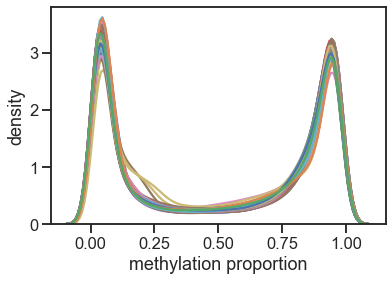

In [170]:
for sample in sample_list:
    
    sns.distplot(betas[sample], hist=False)

plt.xlabel("methylation proportion")
plt.ylabel("density")
plt.show()

# separate groups; calculate average methylation rates

In [171]:
groupA=[]
groupB=[]
groupC=[]
for sample in sample_list:
    if "rep" not in sample:
        if "A" in sample:
            groupA.append(sample)
        elif "B" in sample:
            groupB.append(sample)
        else:
            groupC.append(sample)
print(groupA)
print(groupB)
print(groupC)

samples_ct = [len(groupA),len(groupB),len(groupC)]
samples_ct

['A001', 'A003', 'A006', 'A008', 'A009', 'A011', 'A012', 'A013', 'A014', 'A020', 'A021', 'A031', 'A033', 'A034', 'A035', 'A043', 'A047', 'A049', 'A055', 'A066', 'A072', 'A076', 'A077', 'A081', 'A083', 'A086', 'A088', 'A089', 'A090', 'A093', 'A094', 'A097', 'A098', 'A100', 'A103', 'A108', 'A110', 'A113', 'A114', 'A122', 'A126', 'A130', 'A133', 'A138', 'A140']
['B019', 'B145', 'B148', 'B149', 'B151', 'B154', 'B155', 'B162', 'B163', 'B164', 'B167', 'B168', 'B169', 'B170', 'B171', 'B172', 'B175', 'B179', 'B203', 'B204', 'B207', 'B211', 'B214', 'B215', 'B219', 'B220', 'B226', 'B228', 'B232', 'B233', 'B235', 'B237', 'B239', 'B246', 'B248', 'B257', 'B260', 'B262', 'B264', 'B267', 'B269', 'B271', 'B274', 'B277', 'B279']
['C281', 'C282', 'C286', 'C287', 'C293', 'C294', 'C295', 'C299', 'C301', 'C309', 'C314', 'C317', 'C337', 'C344', 'C346', 'C354', 'C360', 'C361', 'C362', 'C368', 'C369', 'C370', 'C373', 'C375', 'C376', 'C378', 'C380', 'C382', 'C387', 'C388', 'C389', 'C390', 'C391', 'C393', 'C394

[45, 45, 46]

In [172]:
betas_A=betas[groupA]
betas_B=betas[groupB]
betas_C=betas[groupC]

In [173]:
averagesA = []
averagesB = []
averagesC = []

for sample in groupA:
    averagesA.append(betas[sample].mean())
for sample in groupB:
    averagesB.append(betas[sample].mean())
for sample in groupC:
    averagesC.append(betas[sample].mean())

In [174]:
print(averagesA)

[0.4953744110437582, 0.5213716448964814, 0.5021963522146821, 0.5194458042347146, 0.5163583337386625, 0.5182554917606125, 0.5102109440178216, 0.5231721409213026, 0.520056151309501, 0.5049208375776648, 0.5120625759071411, 0.5091011421662224, 0.5221842255419307, 0.509851447472556, 0.5087489235871411, 0.5194821598945267, 0.5202372530775896, 0.5104606364985974, 0.5155409432510043, 0.5173321184124868, 0.5112205536849973, 0.5237798521756055, 0.5202089419630515, 0.5175125828417931, 0.5188649794198152, 0.5154367596150783, 0.5160475499955274, 0.5215790497424717, 0.48842514720360974, 0.5174796130435323, 0.5160615625886199, 0.518391292661567, 0.517240434403606, 0.48557671417211223, 0.5141871683852827, 0.5209389810257118, 0.5161375419126899, 0.5113998308484075, 0.506722375570676, 0.5144226566520144, 0.5074635749187573, 0.5181266142634726, 0.5167039805727389, 0.5083322869649938, 0.5159130981823762]


In [175]:
averagesA_df = pd.DataFrame(averagesA)

averagesA_df["group"] = "exposed"
averagesA_df.head()

,0,group
0,0.495374,exposed
1,0.521372,exposed
2,0.502196,exposed
3,0.519446,exposed
4,0.516358,exposed


In [176]:
averagesB_df = pd.DataFrame(averagesB)

averagesB_df["group"] = "exposed"
averagesB_df.head()

,0,group
0,0.507418,exposed
1,0.509611,exposed
2,0.516905,exposed
3,0.516010,exposed
4,0.519724,exposed


In [177]:
averagesC_df = pd.DataFrame(averagesC)

averagesC_df["group"] = "unexposed"
averagesC_df.head()

,0,group
0,0.520825,unexposed
1,0.522995,unexposed
2,0.521232,unexposed
3,0.509170,unexposed
4,0.514248,unexposed


In [178]:
all_samples_df = pd.concat([averagesA_df, averagesB_df, averagesC_df])
all_samples_df.columns = ["averages", "group"]
all_samples_df

,averages,group
0,0.495374,exposed
1,0.521372,exposed
2,0.502196,exposed
3,0.519446,exposed
4,0.516358,exposed
...,...,...
41,0.513077,unexposed
42,0.518477,unexposed
43,0.518806,unexposed
44,0.488179,unexposed


# plot averages

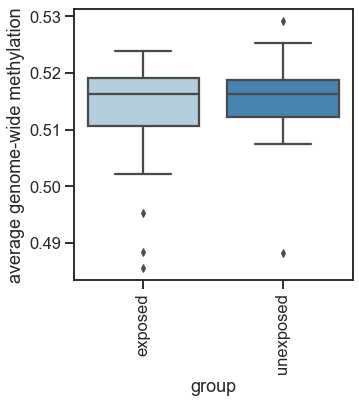

In [179]:
plt.figure(figsize=(5, 5))
sns.boxplot("group", "averages", data=all_samples_df, palette=sns.color_palette("Blues", 2))
plt.xticks(rotation=90)
plt.ylabel("average genome-wide methylation")
plt.show()

In [180]:
samples_df = pd.DataFrame(samples_ct)
samples_df["group"] = "postnatal exposure","in utero exposure", "unexposed"
samples_df.columns=["samples","group"]
samples_df

,samples,group
0,45,postnatal exposure
1,45,in utero exposure
2,46,unexposed


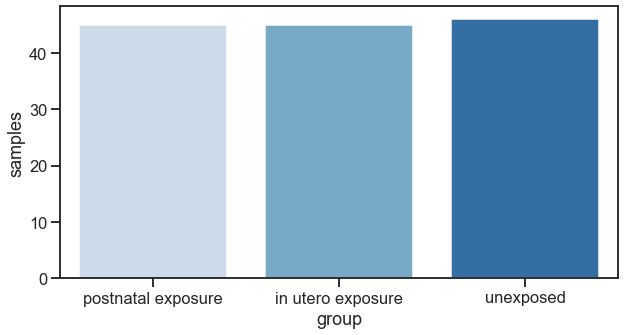

In [181]:
plt.figure(figsize=(10,5))
sns.barplot(x="group", y="samples", data=samples_df,palette="Blues")
plt.show()

# read in ilumina manifest; combine with data

In [182]:
ilum = pd.read_csv("~/Desktop/research/IluminaManifestShortened.csv")

/Users/zeel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [183]:
ilum_df = pd.DataFrame(ilum)
ilum_df = ilum_df.rename(columns={"IlmnID":"ID_Column"})
ilum_df

,ID_Column,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg00035864,cg00035864,Y,8553009.0,TTTY18,TSS1500
1,cg00050873,cg00050873,Y,9363356.0,TSPY4;FAM197Y2,Body;TSS1500
2,cg00061679,cg00061679,Y,25314171.0,DAZ1;DAZ4;DAZ4,Body;Body;Body
3,cg00063477,cg00063477,Y,22741795.0,EIF1AY,Body
4,cg00121626,cg00121626,Y,21664296.0,BCORL2,Body
...,...,...,...,...,...,...
486423,65622344,NORM_T,NaN,NaN,NaN,NaN
486424,57640346,NORM_C,NaN,NaN,NaN,NaN
486425,47715450,NORM_T,NaN,NaN,NaN,NaN
486426,28673402,NORM_C,NaN,NaN,NaN,NaN


In [184]:
combined_df=pd.merge(betas_df,ilum_df,on="ID_Column")
combined_df

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg00000957,0.895048,0.880495,0.883519,0.871774,0.880974,0.848459,0.869477,0.910707,0.863935,...,0.871169,0.874302,0.869468,0.889944,0.875260,cg00000957,1,5937253.0,NPHP4,Body
1,cg00001349,0.712681,0.828745,0.783386,0.796415,0.829997,0.715184,0.827223,0.829003,0.821132,...,0.840920,0.736887,0.839936,0.678318,0.756380,cg00001349,1,166958439.0,MAEL,TSS200
2,cg00001583,0.060255,0.094096,0.080852,0.079633,0.074744,0.062953,0.084129,0.077421,0.080718,...,0.092458,0.081255,0.075852,0.074003,0.083621,cg00001583,1,200011786.0,NR5A2;NR5A2,Body;Body
3,cg00002028,0.049895,0.059334,0.025524,0.046048,0.065009,0.028436,0.055952,0.058450,0.043198,...,0.062565,0.035335,0.144743,0.031379,0.048976,cg00002028,1,20960010.0,PINK1;PINK1,1stExon;5'UTR
4,cg00002719,0.026454,0.041214,0.020660,0.028950,0.046747,0.021787,0.043406,0.017175,0.038114,...,0.031759,0.022788,0.024691,0.034217,0.031175,cg00002719,1,169396706.0,C1orf114,TSS200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422790,ch.22.909671F,0.058381,0.153614,0.035457,0.088401,0.109302,0.060001,0.246872,0.172702,0.153935,...,0.110759,0.049310,0.161262,0.044129,0.141933,ch.22.909671F,22,46114168.0,ATXN10;ATXN10,Body;Body
422791,ch.22.46830341F,0.021935,0.006510,0.023635,0.027201,0.006445,0.043293,0.012611,0.012041,0.008212,...,0.015465,0.028291,0.007737,0.031746,0.015583,ch.22.46830341F,22,48451677.0,NaN,NaN
422792,ch.22.1008279F,0.017037,0.014948,0.011020,0.006164,0.013529,0.029041,0.005956,0.008250,0.007338,...,0.005734,0.021776,0.007924,0.026880,0.000649,ch.22.1008279F,22,48731367.0,NaN,NaN
422793,ch.22.47579720R,0.032803,0.041379,0.048460,0.045756,0.032303,0.068397,0.024930,0.047959,0.051075,...,0.041109,0.043154,0.036811,0.031242,0.038840,ch.22.47579720R,22,49193714.0,NaN,NaN


In [185]:
combined_df_no_nan = combined_df.dropna()

# methylation at sites in Bangladesh paper

In [186]:
vtrna2_1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("VTRNA2-1")]
vtrna2_1 #none found

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group


In [187]:
pax8 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("PAX8")]
pax8

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
11617,cg01577475,0.084851,0.103019,0.128578,0.108429,0.098100,0.067471,0.111362,0.130914,0.122129,...,0.104046,0.055326,0.093267,0.048121,0.121262,cg01577475,2,114033581.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839,Body;Body;Body;Body;Body;Body
13129,cg06881093,0.312024,0.359970,0.308153,0.412114,0.443597,0.196911,0.353322,0.418011,0.280651,...,0.408576,0.297669,0.413049,0.330579,0.385675,cg06881093,2,114035983.0,PAX8;PAX8;PAX8;PAX8;LOC440839;PAX8,5'UTR;5'UTR;5'UTR;5'UTR;Body;5'UTR
13332,cg07594247,0.565812,0.641221,0.625944,0.810351,0.810443,0.609025,0.694807,0.734835,0.533350,...,0.694777,0.743663,0.721811,0.685789,0.539381,cg07594247,2,113993304.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839;LOC654433,Body;Body;Body;Body;Body;Body;TSS1500
13374,cg07772999,0.549632,0.597178,0.571731,0.770528,0.735930,0.588026,0.630633,0.683611,0.490664,...,0.676989,0.637152,0.707438,0.603032,0.540279,cg07772999,2,113993052.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839;LOC654433,Body;Body;Body;Body;Body;Body;TSS1500
13775,cg09234973,0.917837,0.902259,0.903679,0.912496,0.918446,0.871294,0.886397,0.904099,0.888825,...,0.921439,0.852828,0.937899,0.869327,0.929618,cg09234973,2,113975820.0,PAX8;PAX8;PAX8;PAX8;LOC440839;PAX8,3'UTR;3'UTR;3'UTR;3'UTR;Body;3'UTR
14511,cg11763394,0.665745,0.676375,0.703200,0.935611,0.900516,0.723486,0.709060,0.779552,0.588421,...,0.740643,0.784340,0.752133,0.765750,0.636229,cg11763394,2,113992921.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839;LOC654433,Body;Body;Body;Body;Body;Body;TSS1500
14793,cg12889195,0.615837,0.727870,0.727755,0.921385,0.922955,0.701482,0.772594,0.835533,0.597340,...,0.822228,0.802890,0.857576,0.794705,0.689118,cg12889195,2,113992843.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839;LOC654433,Body;Body;Body;Body;Body;Body;TSS1500
17317,cg21550016,0.646854,0.668568,0.695557,0.933563,0.886516,0.716127,0.701167,0.766623,0.597525,...,0.759125,0.792739,0.748253,0.744568,0.642264,cg21550016,2,113992930.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839;LOC654433,Body;Body;Body;Body;Body;Body;TSS1500
17336,cg21610815,0.876911,0.866158,0.888287,0.930296,0.939060,0.887706,0.839803,0.933932,0.851960,...,0.862947,0.940232,0.913299,0.884350,0.826830,cg21610815,2,113994035.0,PAX8;PAX8;LOC654433;PAX8;PAX8;PAX8;LOC440839,Body;Body;Body;Body;Body;Body;Body
18401,cg25243455,0.054231,0.094885,0.080668,0.061805,0.078047,0.064345,0.061729,0.052467,0.070475,...,0.052567,0.046556,0.041059,0.048746,0.073522,cg25243455,2,114033360.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839,Body;Body;Body;Body;Body;Body


In [188]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(pax8[sample].mean())

        if "A" in sample:
            group_ids.append("postnatal")
        elif "B" in sample:
            group_ids.append("in utero")
        else:
            group_ids.append("unexposed")

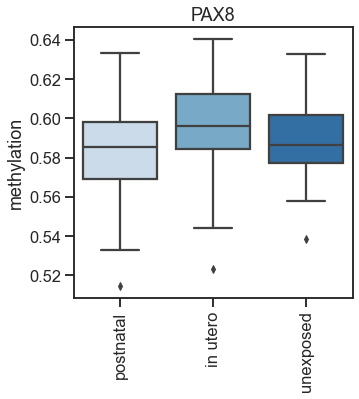

In [189]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("PAX8")
plt.show()

In [190]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]

In [191]:
# combined_subset = combined[combined["group"].isin(["unexposed", "in utero"])]

In [192]:
X = combined["means"].values
Y = combined["group"].values

In [193]:
x2 = sm.add_constant(X.astype(float))

In [194]:
est = sm.MNLogit(Y, x2)

In [195]:
est2 = est.fit()

Optimization terminated successfully.
         Current function value: 1.069250
         Iterations 5


In [196]:
print(est2.summary())

                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      132
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                 0.02668
Time:                        21:57:24   Log-Likelihood:                -145.42
converged:                       True   LL-Null:                       -149.40
Covariance Type:            nonrobust   LLR p-value:                   0.01857
y=postnatal       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          15.9635      5.953      2.682      0.007       4.296      27.631
x1            -27.0483     10.070     -2.686      0.007     -46.785      -7.312
------------------------------------------------

In [197]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(pax8[sample].mean())

    if "A" in sample:
        group_ids.append("postnatal")
    elif "B" in sample:
        group_ids.append("in utero")
    else:
        group_ids.append("unexposed")

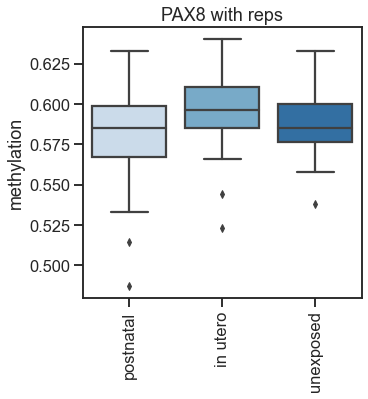

In [198]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("PAX8 with reps")
plt.show()

In [199]:
prdm9 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("PRDM9")]
prdm9

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
29700,cg02444433,0.674426,0.847333,0.812884,0.795026,0.731239,0.669756,0.700830,0.694102,0.742943,...,0.805917,0.710328,0.726856,0.735449,0.677153,cg02444433,5,23507469.0,PRDM9,TSS1500
33136,cg19837938,0.639631,0.769217,0.686833,0.688180,0.665896,0.596256,0.674341,0.674059,0.658934,...,0.741903,0.622679,0.676555,0.645526,0.567747,cg19837938,5,23507458.0,PRDM9,TSS1500
33464,cg22054885,0.654429,0.807015,0.743543,0.702875,0.691301,0.625445,0.667405,0.670098,0.651924,...,0.782263,0.663443,0.704231,0.701603,0.632687,cg22054885,5,23507450.0,PRDM9,TSS1500
34135,cg25472530,0.595039,0.699835,0.478047,0.556732,0.549701,0.555634,0.546937,0.530808,0.441851,...,0.754779,0.563676,0.559342,0.672983,0.346615,cg25472530,5,23507617.0,PRDM9,TSS200
200629,cg01667892,0.803838,0.853986,0.670770,0.659362,0.619413,0.729197,0.663608,0.647417,0.459512,...,0.848302,0.756458,0.700940,0.800129,0.417785,cg01667892,5,23507656.0,PRDM9,TSS200
202348,cg04362002,0.610212,0.672689,0.679289,0.698222,0.629584,0.647265,0.626123,0.583045,0.598941,...,0.641396,0.619511,0.652244,0.633933,0.543514,cg04362002,5,23506738.0,PRDM9,TSS1500
206063,cg10589310,0.714448,0.824921,0.757756,0.701842,0.705482,0.714315,0.698348,0.688804,0.731211,...,0.771215,0.734222,0.709485,0.725274,0.622027,cg10589310,5,23507030.0,PRDM9,TSS1500
212562,cg22079902,0.731161,0.837117,0.719801,0.711388,0.698029,0.797029,0.698013,0.697721,0.568660,...,0.853100,0.737527,0.660960,0.891717,0.493343,cg22079902,5,23507644.0,PRDM9,TSS200


In [200]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(prdm9[sample].mean())

        if "A" in sample:
            group_ids.append("postnatal")
        elif "B" in sample:
            group_ids.append("in utero")
        else:
            group_ids.append("unexposed")

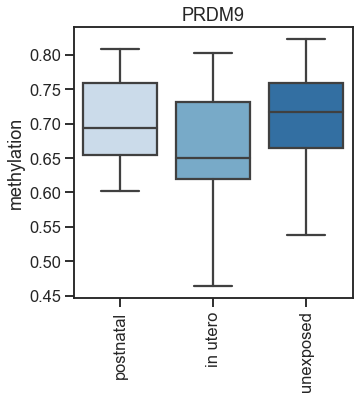

In [201]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("PRDM9")
plt.show()

In [202]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.067401
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      132
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                 0.02836
Time:                        21:57:25   Log-Likelihood:                -145.17
converged:                       True   LL-Null:                       -149.40
Covariance Type:            nonrobust   LLR p-value:                   0.01444
y=postnatal       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.9852      2.161     -2.307      0.021      -9.221      -0.749
x1              7.2704    

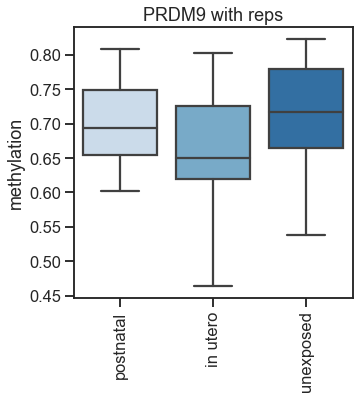

In [203]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(prdm9[sample].mean())

    if "A" in sample:
        group_ids.append("postnatal")
    elif "B" in sample:
        group_ids.append("in utero")
    else:
        group_ids.append("unexposed")
        
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("PRDM9 with reps")
plt.show()

In [204]:
zfp57 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("ZFP57")]
zfp57

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
38224,cg12463578,0.686229,0.627365,0.452063,0.560381,0.611204,0.540008,0.574046,0.610697,0.613713,...,0.597990,0.560123,0.584467,0.621116,0.505185,cg12463578,6,29644756.0,ZFP57,1stExon
216440,cg00539542,0.955187,0.930843,0.901332,0.940879,0.957019,0.957010,0.947352,0.949722,0.938422,...,0.932355,0.947264,0.921977,0.951524,0.952772,cg00539542,6,29644544.0,ZFP57,Body
218831,cg02887726,0.982395,0.977414,0.974602,0.974476,0.978407,0.964600,0.982567,0.983409,0.969112,...,0.975838,0.969985,0.984667,0.982710,0.977443,cg02887726,6,29641082.0,ZFP57,Body
219186,cg03200120,0.979245,0.953977,0.927211,0.949190,0.936765,0.990483,0.931668,0.961643,0.951981,...,0.939089,0.975917,0.934301,0.965035,0.948135,cg03200120,6,29641443.0,ZFP57,Body
225407,cg10174063,0.063062,0.216543,0.098942,0.222650,0.225674,0.124422,0.238718,0.262082,0.169844,...,0.165937,0.068910,0.208989,0.057087,0.130104,cg10174063,6,29645038.0,ZFP57,TSS200
238040,cg25396488,0.953863,0.941539,0.968595,0.952695,0.947550,0.968688,0.943783,0.952843,0.960959,...,0.942511,0.959336,0.943270,0.947401,0.947349,cg25396488,6,29641118.0,ZFP57,Body
238507,cg26021304,0.069345,0.204920,0.384598,0.155576,0.183951,0.057357,0.194254,0.184270,0.088839,...,0.140266,0.048201,0.181628,0.065549,0.146872,cg26021304,6,29645117.0,ZFP57,TSS200


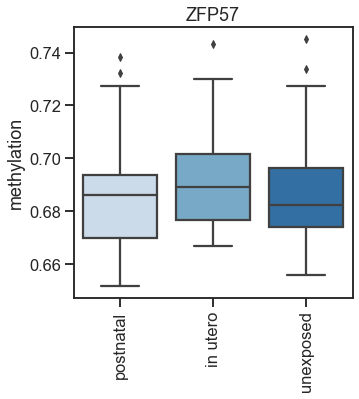

In [205]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(zfp57[sample].mean())

        if "A" in sample:
            group_ids.append("postnatal")
        elif "B" in sample:
            group_ids.append("in utero")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("ZFP57")
plt.show()

In [206]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.088302
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      132
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                0.009336
Time:                        21:57:26   Log-Likelihood:                -148.01
converged:                       True   LL-Null:                       -149.40
Covariance Type:            nonrobust   LLR p-value:                    0.2479
y=postnatal       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.2050      7.546      1.485      0.138      -3.586      25.996
x1            -16.2545    

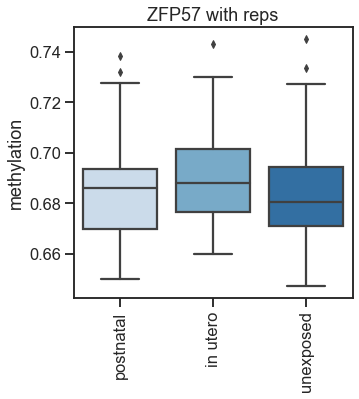

In [207]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(zfp57[sample].mean())

    if "A" in sample:
        group_ids.append("postnatal")
    elif "B" in sample:
        group_ids.append("in utero")
    else:
        group_ids.append("unexposed")
        
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("ZFP57 with reps")
plt.show()

In [208]:
bola = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("BOLA")]
bola 

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
7356,cg17906269,0.189469,0.090537,0.084968,0.074671,0.111167,0.183914,0.074963,0.097325,0.100254,...,0.068593,0.135171,0.074136,0.203724,0.071602,cg17906269,1,149871404.0,BOLA1,5'UTR
8177,cg20164915,0.232506,0.128175,0.129871,0.120926,0.133370,0.280409,0.142981,0.130384,0.163787,...,0.098092,0.223728,0.120510,0.232660,0.105458,cg20164915,1,149871167.0,BOLA1;BOLA1,1stExon;5'UTR
11120,cg27541317,0.130947,0.352713,0.195015,0.235611,0.304804,0.234513,0.242020,0.314589,0.272566,...,0.289490,0.153288,0.265797,0.130459,0.220310,cg27541317,1,149871625.0,BOLA1,Body
11402,cg00724035,0.035688,0.031872,0.041235,0.033213,0.016819,0.022800,0.019921,0.050441,0.051599,...,0.035698,0.019592,0.044768,0.028019,0.031262,cg00724035,2,74375213.0,BOLA3;BOLA3,TSS200;TSS200
11739,cg02051239,0.067526,0.128924,0.223478,0.204718,0.209062,0.034332,0.163688,0.186839,0.180108,...,0.201887,0.075646,0.114216,0.085356,0.202347,cg02051239,2,74375507.0,BOLA3;BOLA3,TSS1500;TSS1500
13733,cg09036127,0.016219,0.019212,0.017946,0.021367,0.018028,0.019361,0.009964,0.016088,0.006550,...,0.014865,0.022368,0.020434,0.022615,0.017311,cg09036127,2,74375193.0,BOLA3;BOLA3,TSS200;TSS200
13932,cg09717809,0.931415,0.952308,0.955678,0.940271,0.951578,0.935240,0.941166,0.938311,0.918071,...,0.927321,0.949035,0.942332,0.962800,0.948796,cg09717809,2,74375930.0,BOLA3;BOLA3,TSS1500;TSS1500
14259,cg10804730,0.041712,0.067635,0.036256,0.047275,0.063618,0.041519,0.069970,0.061772,0.064881,...,0.066860,0.048758,0.084107,0.037873,0.047096,cg10804730,2,74375143.0,BOLA3;BOLA3,TSS200;TSS200
16028,cg17053845,0.033582,0.030110,0.036773,0.038179,0.059185,0.028214,0.031968,0.034042,0.049716,...,0.042104,0.024772,0.035277,0.024331,0.048870,cg17053845,2,74375133.0,BOLA3;BOLA3,TSS200;TSS200
17043,cg20644426,0.039385,0.018396,0.057444,0.056482,0.050171,0.027702,0.043288,0.058787,0.059356,...,0.054305,0.044397,0.070109,0.040294,0.053845,cg20644426,2,74375147.0,BOLA3;BOLA3,TSS200;TSS200


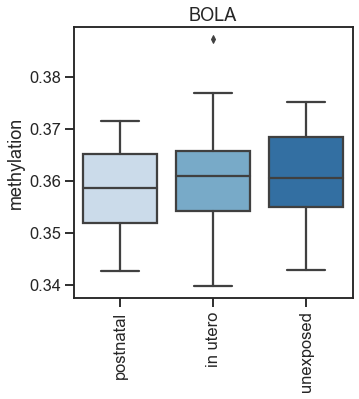

In [209]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(bola[sample].mean())

        if "A" in sample:
            group_ids.append("postnatal")
        elif "B" in sample:
            group_ids.append("in utero")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("BOLA")
plt.show()

In [210]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.090081
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      132
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                0.007717
Time:                        21:57:26   Log-Likelihood:                -148.25
converged:                       True   LL-Null:                       -149.40
Covariance Type:            nonrobust   LLR p-value:                    0.3157
y=postnatal       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.6990      9.140      1.171      0.242      -7.216      28.614
x1            -29.7463    

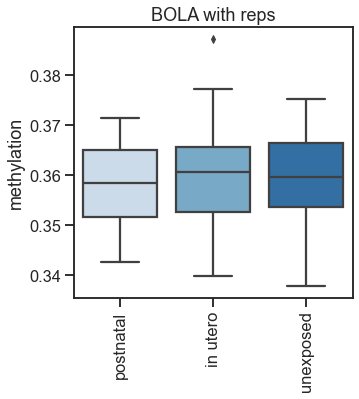

In [211]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(bola[sample].mean())

    if "A" in sample:
        group_ids.append("postnatal")
    elif "B" in sample:
        group_ids.append("in utero")
    else:
        group_ids.append("unexposed")
        
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("BOLA with reps")
plt.show()

In [212]:
exp3 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("EXP3")]
exp3 #none found

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group


# methylation at specific sites

In [213]:
cdk1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("CDK1;")]
cdk1

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
56321,cg01394540,0.055090,0.039955,0.062305,0.056728,0.036189,0.055528,0.057757,0.057423,0.077725,...,0.056517,0.060512,0.042303,0.068764,0.051156,cg01394540,10,62537996.0,CDC2;CDK1;CDK1;CDK1;CDK1,TSS1500;TSS1500;TSS1500;TSS200;TSS1500
57531,cg06793798,0.219891,0.124073,0.106047,0.114016,0.115522,0.218753,0.113898,0.122748,0.137598,...,0.095038,0.210304,0.108404,0.210809,0.089160,cg06793798,10,62538126.0,CDK1;CDC2;CDK1;CDK1;CDK1;CDK1,TSS200;TSS200;5'UTR;1stExon;TSS200;TSS200
59046,cg13554667,0.076303,0.099231,0.108542,0.101126,0.125613,0.090178,0.118953,0.133094,0.094736,...,0.128150,0.073203,0.233029,0.060065,0.077513,cg13554667,10,62538283.0,CDK1;CDK1;CDK1;CDC2;CDK1;CDK1;CDK1;CDK1,5'UTR;5'UTR;1stExon;TSS200;1stExon;5'UTR;1stEx...
59126,cg13954297,0.105978,0.027867,0.028575,0.027505,0.022151,0.115564,0.035774,0.023968,0.030691,...,0.025876,0.072994,0.029625,0.094843,0.023752,cg13954297,10,62538113.0,CDK1;CDC2;CDK1;CDK1;CDK1;CDK1,TSS200;TSS200;5'UTR;1stExon;TSS200;TSS200
59415,cg15172601,0.041697,0.078832,0.035167,0.031273,0.064907,0.043721,0.058221,0.037075,0.051762,...,0.069608,0.036364,0.037299,0.038852,0.041160,cg15172601,10,62538042.0,CDK1;CDC2;CDK1;CDK1;CDK1,TSS200;TSS1500;TSS200;TSS200;TSS200
61101,cg23973115,0.827115,0.789467,0.822105,0.849864,0.798363,0.820187,0.756442,0.797344,0.820414,...,0.720378,0.804391,0.625993,0.530583,0.694590,cg23973115,10,62540149.0,CDK1;CDK1;CDK1;CDC2;CDK1,Body;Body;Body;Body;Body
61382,cg25228510,0.068661,0.150687,0.161737,0.142874,0.188958,0.103687,0.183443,0.183226,0.143155,...,0.166300,0.071899,0.211050,0.065468,0.116236,cg25228510,10,62538235.0,CDK1;CDK1;CDK1;CDC2;CDK1;CDK1;CDK1;CDK1,5'UTR;5'UTR;1stExon;TSS200;1stExon;5'UTR;1stEx...
61508,cg25793692,0.184322,0.143982,0.098866,0.085427,0.113926,0.186979,0.114177,0.112453,0.108655,...,0.116622,0.123028,0.165885,0.131755,0.076059,cg25793692,10,62538781.0,CDK1;CDC2;CDK1;CDK1;CDK1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR
61921,cg27457323,0.044615,0.062229,0.041591,0.040134,0.060996,0.045659,0.046368,0.067672,0.045494,...,0.058652,0.042314,0.057893,0.035640,0.044155,cg27457323,10,62538048.0,CDK1;CDC2;CDK1;CDK1;CDK1,TSS200;TSS1500;TSS200;TSS200;TSS200
280446,cg00509281,0.976663,0.924001,0.959644,0.933643,0.914578,0.922765,0.917529,0.894248,0.958290,...,0.927526,0.967964,0.744485,0.942356,0.943162,cg00509281,10,62554092.0,CDC2;CDK1;CDK1,3'UTR;3'UTR;3'UTR


In [214]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(cdk1[sample].mean())

        if "A" in sample:
            group_ids.append("postnatal")
        elif "B" in sample:
            group_ids.append("in utero")
        else:
            group_ids.append("unexposed")

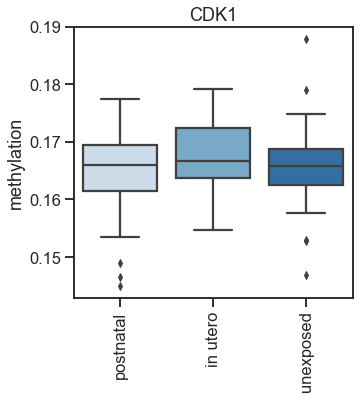

In [215]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("CDK1")
plt.show()

In [216]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.089711
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      132
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                0.008054
Time:                        21:57:27   Log-Likelihood:                -148.20
converged:                       True   LL-Null:                       -149.40
Covariance Type:            nonrobust   LLR p-value:                    0.3002
y=postnatal       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.7242      5.217      1.481      0.139      -2.501      17.949
x1            -46.4964    

In [217]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(cdk1[sample].mean())

    if "A" in sample:
        group_ids.append("postnatal")
    elif "B" in sample:
        group_ids.append("in utero")
    else:
        group_ids.append("unexposed")

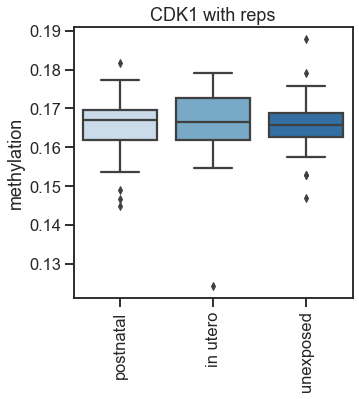

In [218]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("CDK1 with reps")
plt.show()

In [219]:
hmga1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("HMGA1")]
hmga1

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
37567,cg10167849,0.030310,0.039260,0.026580,0.032331,0.034788,0.041217,0.027798,0.030219,0.022808,...,0.027338,0.057942,0.023349,0.052845,0.017415,cg10167849,6,34206152.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS1500
37580,cg10200629,0.054678,0.056000,0.039079,0.040266,0.045861,0.049530,0.029660,0.047369,0.029522,...,0.051371,0.043169,0.050877,0.049387,0.047008,cg10200629,6,34205665.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS1500
38850,cg14590677,0.044811,0.043367,0.055658,0.051399,0.045694,0.042189,0.044816,0.047076,0.039992,...,0.056365,0.037039,0.046001,0.034877,0.045179,cg14590677,6,34204551.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS200;TSS200;TSS200;TSS200;TSS200
40010,cg18696576,0.171153,0.128497,0.117626,0.142497,0.114952,0.171014,0.122142,0.154616,0.118699,...,0.127412,0.139616,0.152366,0.156804,0.096223,cg18696576,6,34203630.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500
40412,cg20294304,0.116834,0.097384,0.054701,0.069540,0.134254,0.057123,0.137993,0.086223,0.091782,...,0.081864,0.082695,0.059201,0.063096,0.060270,cg20294304,6,34203153.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500
40651,cg21234474,0.049102,0.015302,0.046478,0.041822,0.014326,0.055261,0.041426,0.044047,0.050338,...,0.032785,0.051023,0.047613,0.043151,0.032632,cg21234474,6,34204646.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS200;5'UTR;5'UTR;TSS200;1stExon;1stExon;1stE...
216442,cg00544436,0.083596,0.065180,0.040703,0.051360,0.057136,0.176977,0.054699,0.058502,0.041392,...,0.046979,0.087065,0.048112,0.091897,0.039277,cg00544436,6,34203564.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500
217692,cg01745499,0.084627,0.060756,0.066778,0.069586,0.039750,0.168725,0.063636,0.044634,0.058804,...,0.050347,0.062199,0.057460,0.088577,0.050978,cg01745499,6,34206084.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS1500
218583,cg02654940,0.480019,0.481155,0.400407,0.503271,0.515094,0.509432,0.435166,0.496928,0.489718,...,0.466464,0.410895,0.490602,0.358716,0.336767,cg02654940,6,34206400.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS200
218977,cg03020951,0.032942,0.022796,0.020699,0.029276,0.020638,0.028068,0.021242,0.034415,0.023394,...,0.019114,0.034550,0.023895,0.036761,0.015384,cg03020951,6,34203887.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500


In [220]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(hmga1[sample].mean())

        if "A" in sample:
            group_ids.append("postnatal")
        elif "B" in sample:
            group_ids.append("in utero")
        else:
            group_ids.append("unexposed")

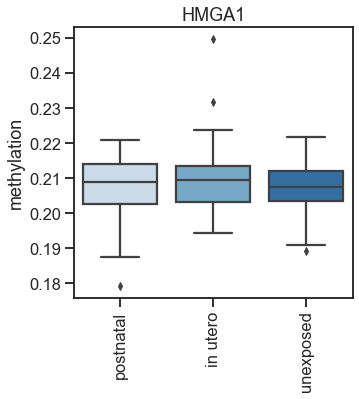

In [221]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("HMGA1")
plt.show()

In [222]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.085290
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      132
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                 0.01208
Time:                        21:57:28   Log-Likelihood:                -147.60
converged:                       True   LL-Null:                       -149.40
Covariance Type:            nonrobust   LLR p-value:                    0.1646
y=postnatal       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.1568      5.336      1.529      0.126      -2.301      18.614
x1            -39.0664    

In [223]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(hmga1[sample].mean())

    if "A" in sample:
        group_ids.append("postnatal")
    elif "B" in sample:
        group_ids.append("in utero")
    else:
        group_ids.append("unexposed")

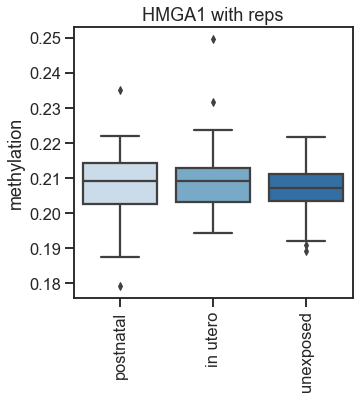

In [224]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("HMGA1 with reps")
plt.show()

In [225]:
dnajb6 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("DNAJB6")]
dnajb6

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
42608,cg00553120,0.014673,0.022551,0.015337,0.017652,0.025580,0.016776,0.015092,0.020022,0.018084,...,0.021212,0.014404,0.020900,0.017002,0.013928,cg00553120,7,157129669.0,DNAJB6;DNAJB6,TSS200;TSS200
42797,cg01410440,0.947754,0.927614,0.965224,0.949772,0.916905,0.942928,0.925675,0.890214,0.951849,...,0.925095,0.962896,0.871240,0.945548,0.958383,cg01410440,7,157193063.0,DNAJB6,Body
43584,cg04430780,0.898723,0.814323,0.878985,0.881536,0.831220,0.860137,0.905677,0.857601,0.871253,...,0.866313,0.882457,0.870085,0.897559,0.870665,cg04430780,7,157199439.0,DNAJB6,Body
44444,cg07569018,0.989066,0.979565,0.981869,0.987188,0.977933,0.987933,0.987511,0.980205,0.984975,...,0.987129,0.982868,0.980437,0.983302,0.987466,cg07569018,7,157202818.0,DNAJB6,Body
44546,cg08011146,0.921682,0.945544,0.952342,0.952932,0.947973,0.926855,0.950203,0.942614,0.930812,...,0.938573,0.916251,0.952936,0.913452,0.930698,cg08011146,7,157195815.0,DNAJB6,Body
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258216,cg26668151,0.057944,0.072047,0.040114,0.079807,0.119055,0.052331,0.103471,0.105213,0.057087,...,0.088833,0.032918,0.163039,0.030577,0.040775,cg26668151,7,157180005.0,DNAJB6,Body
258326,cg26860459,0.982082,0.983031,0.977855,0.980841,0.984416,0.979796,0.953531,0.957225,0.970877,...,0.985398,0.977647,0.982412,0.977254,0.975534,cg26860459,7,157199417.0,DNAJB6,Body
258425,cg27023755,0.971600,0.947974,0.961827,0.959973,0.945526,0.984272,0.969266,0.944060,0.970741,...,0.969880,0.965226,0.946010,0.971547,0.957876,cg27023755,7,157200373.0,DNAJB6,Body
258739,cg27525636,0.898684,0.935493,0.905394,0.889942,0.912050,0.907800,0.932010,0.909123,0.858530,...,0.939134,0.912925,0.942431,0.938560,0.938800,cg27525636,7,157171342.0,DNAJB6;DNAJB6,Body;Body


In [226]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(dnajb6[sample].mean())

        if "A" in sample:
            group_ids.append("postnatal")
        elif "B" in sample:
            group_ids.append("in utero")
        else:
            group_ids.append("unexposed")

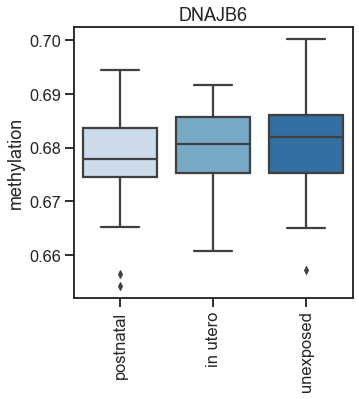

In [227]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("DNAJB6")
plt.show()

In [228]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.083284
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      132
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                 0.01390
Time:                        21:57:29   Log-Likelihood:                -147.33
converged:                       True   LL-Null:                       -149.40
Covariance Type:            nonrobust   LLR p-value:                    0.1253
y=postnatal       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          27.5030     18.954      1.451      0.147      -9.646      64.652
x1            -40.4900    

In [229]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(dnajb6[sample].mean())

    if "A" in sample:
        group_ids.append("postnatal")
    elif "B" in sample:
        group_ids.append("in utero")
    else:
        group_ids.append("unexposed")

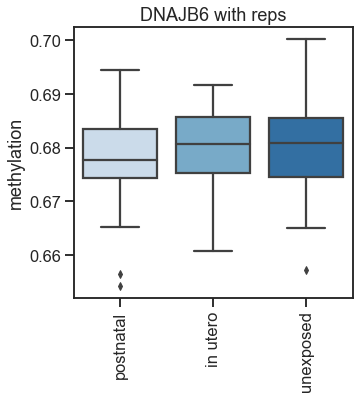

In [230]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("DNAJB6 with reps")
plt.show()

In [231]:
wfdc9 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("WFDC9")]
wfdc9

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
409021,cg02605634,0.113334,0.159902,0.068926,0.104377,0.129400,0.147310,0.146927,0.132793,0.087766,...,0.131102,0.130721,0.146014,0.120691,0.098538,cg02605634,20,44258384.0,WFDC10A;WFDC9;WFDC10A,5'UTR;5'UTR;1stExon
411258,cg11764966,0.031182,0.052171,0.041682,0.058497,0.059252,0.044980,0.051978,0.045593,0.036511,...,0.043628,0.041038,0.035700,0.030103,0.046165,cg11764966,20,44258197.0,WFDC10A;WFDC9,TSS200;5'UTR
411335,cg12061127,0.931129,0.860589,0.836542,0.884768,0.858392,0.921663,0.880952,0.863667,0.868546,...,0.872364,0.916718,0.881837,0.887300,0.876877,cg12061127,20,44259912.0,WFDC9,TSS200
411501,cg12740857,0.930950,0.934638,0.929213,0.965772,0.964976,0.884783,0.942978,0.962137,0.952400,...,0.959924,0.978867,0.956254,0.914121,0.891490,cg12740857,20,44237356.0,WFDC9,Body
412036,cg15107861,0.067581,0.121393,0.052599,0.074874,0.103136,0.101959,0.113947,0.076452,0.050341,...,0.061090,0.065505,0.060406,0.070484,0.071433,cg15107861,20,44258271.0,WFDC10A;WFDC9,TSS200;5'UTR
412144,cg15638170,0.960140,0.951520,0.947414,0.951665,0.957452,0.956793,0.932485,0.951138,0.957451,...,0.964953,0.966497,0.979137,0.974218,0.956784,cg15638170,20,44261252.0,WFDC9,TSS1500
412309,cg16496526,0.054346,0.087476,0.054891,0.071109,0.077303,0.116511,0.073918,0.053295,0.062969,...,0.047873,0.044318,0.059895,0.056517,0.073186,cg16496526,20,44258267.0,WFDC10A;WFDC9,TSS200;5'UTR
412459,cg17133224,0.968651,0.968341,0.937345,0.968982,0.974884,0.939367,0.975840,0.970996,0.962313,...,0.965936,0.934348,0.953400,0.940906,0.967847,cg17133224,20,44236736.0,WFDC9,3'UTR
413116,cg20169185,0.929028,0.915661,0.917470,0.897175,0.950544,0.890978,0.929810,0.947463,0.922023,...,0.931203,0.857163,0.926004,0.910682,0.874654,cg20169185,20,44261389.0,WFDC9,TSS1500
414019,cg24337225,0.960590,0.924645,0.938589,0.944308,0.939078,0.972598,0.938031,0.927883,0.946999,...,0.948912,0.963561,0.965965,0.958981,0.946091,cg24337225,20,44259589.0,WFDC10A;WFDC9,Body;5'UTR


In [232]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(wfdc9[sample].mean())

        if "A" in sample:
            group_ids.append("postnatal")
        elif "B" in sample:
            group_ids.append("in utero")
        else:
            group_ids.append("unexposed")

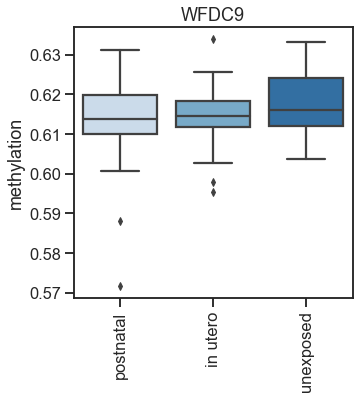

In [233]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("WFDC9")
plt.show()

In [234]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.080549
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      132
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                 0.01639
Time:                        21:57:29   Log-Likelihood:                -146.95
converged:                       True   LL-Null:                       -149.40
Covariance Type:            nonrobust   LLR p-value:                   0.08636
y=postnatal       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.5100     14.847      0.371      0.711     -23.590      34.610
x1             -8.9755    

In [247]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(wfdc9[sample].mean())

    if "A" in sample:
        group_ids.append("postnatal")
    elif "B" in sample:
        group_ids.append("in utero")
    else:
        group_ids.append("unexposed")

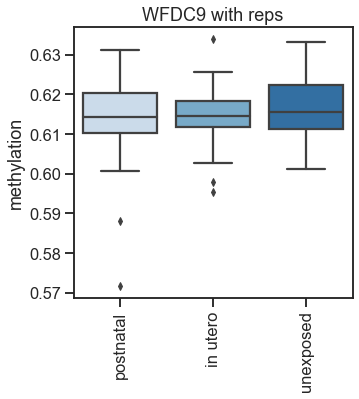

In [236]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("WFDC9 with reps")
plt.show()

In [248]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.090763
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  153
Model:                        MNLogit   Df Residuals:                      149
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                0.006100
Time:                        22:08:38   Log-Likelihood:                -166.89
converged:                       True   LL-Null:                       -167.91
Covariance Type:            nonrobust   LLR p-value:                    0.3590
y=postnatal       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3105     14.478      0.091      0.928     -27.066      29.687
x1             -2.2324    

In [237]:
oxct1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("OXCT1")]
oxct1

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
29383,cg01060059,0.030957,0.213790,0.052960,0.050422,0.096224,0.049166,0.045432,0.038566,0.039759,...,0.104306,0.039776,0.056747,0.028645,0.032897,cg01060059,5,41870081.0,OXCT1,Body
33029,cg19435381,0.099895,0.058071,0.024452,0.035616,0.053950,0.061054,0.040118,0.036282,0.043392,...,0.046759,0.074759,0.033409,0.068419,0.035880,cg19435381,5,41870796.0,OXCT1,TSS200
33188,cg20405584,0.051161,0.075050,0.051782,0.056862,0.066830,0.060582,0.041655,0.065053,0.058496,...,0.053346,0.049680,0.055474,0.053620,0.050782,cg20405584,5,41870875.0,OXCT1,TSS200
200311,cg01186871,0.962262,0.961682,0.943284,0.955035,0.958441,0.963433,0.979907,0.967445,0.969111,...,0.975440,0.947281,0.956675,0.961038,0.957179,cg01186871,5,41868227.0,OXCT1,Body
201226,cg02389942,0.247411,0.335619,0.209958,0.222712,0.259524,0.324231,0.232623,0.193126,0.264219,...,0.247588,0.354824,0.376891,0.270061,0.166261,cg02389942,5,41869679.0,OXCT1,Body
201264,cg02441090,0.712193,0.782427,0.716564,0.754687,0.753645,0.810961,0.738742,0.757758,0.757445,...,0.767131,0.758530,0.823864,0.698777,0.714443,cg02441090,5,41871058.0,OXCT1,TSS1500
201838,cg03604312,0.941274,0.926429,0.956621,0.963472,0.946470,0.886723,0.958019,0.958230,0.946147,...,0.941376,0.895616,0.913136,0.934342,0.962123,cg03604312,5,41730687.0,OXCT1,3'UTR
202726,cg04981722,0.031592,0.030720,0.044614,0.039532,0.030518,0.048733,0.034275,0.029052,0.037064,...,0.020725,0.036298,0.041359,0.027582,0.042433,cg04981722,5,41870862.0,OXCT1,TSS200
203589,cg06537708,0.884868,0.905958,0.891344,0.900394,0.912063,0.935834,0.901949,0.936114,0.878154,...,0.922457,0.923821,0.947800,0.918290,0.899494,cg06537708,5,41871170.0,OXCT1,TSS1500
205014,cg08590939,0.092214,0.248375,0.081530,0.084555,0.118524,0.214585,0.124387,0.056222,0.078981,...,0.141573,0.152092,0.178943,0.095498,0.069021,cg08590939,5,41869963.0,OXCT1,Body


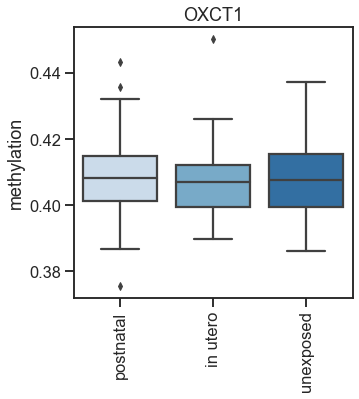

In [238]:
means = []
group_ids = []

for sample in list(sample_list):
    if not "rep" in sample:
        means.append(oxct1[sample].mean())

        if "A" in sample:
            group_ids.append("postnatal")
        elif "B" in sample:
            group_ids.append("in utero")
        else:
            group_ids.append("unexposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("OXCT1")
plt.show()

In [239]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 1.097216
         Iterations 4
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                  136
Model:                        MNLogit   Df Residuals:                      132
Method:                           MLE   Df Model:                            2
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                0.001222
Time:                        21:57:30   Log-Likelihood:                -149.22
converged:                       True   LL-Null:                       -149.40
Covariance Type:            nonrobust   LLR p-value:                    0.8332
y=postnatal       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.3950      7.299     -0.465      0.642     -17.701      10.911
x1              8.3340    

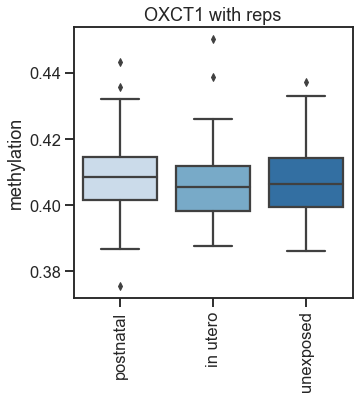

In [240]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(oxct1[sample].mean())

    if "A" in sample:
        group_ids.append("postnatal")
    elif "B" in sample:
        group_ids.append("in utero")
    else:
        group_ids.append("unexposed")
        
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Blues", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("OXCT1 with reps")
plt.show()

# adjusting buffer regions (demo)

In [241]:
combined_df["CHR"] = combined_df["CHR"].astype(str)

In [242]:
combined_df[(combined_df["CHR"] == 8) & (combined_df["MAPINFO"] >= 63972048 ) & (combined_df["MAPINFO"] <= 63998612 )]

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group


In [243]:
buffer_region = 0

In [244]:
combined_df[(combined_df["CHR"] == "2") & (combined_df["MAPINFO"] >= 114033581.0 ) & (combined_df["MAPINFO"] <= 114033581.0 )]

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
11617,cg01577475,0.084851,0.103019,0.128578,0.108429,0.0981,0.067471,0.111362,0.130914,0.122129,...,0.104046,0.055326,0.093267,0.048121,0.121262,cg01577475,2,114033581.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839,Body;Body;Body;Body;Body;Body


In [245]:
113,992,762.0

(113, 992, 762.0)

In [246]:
combined_df

,ID_Column,A001,A003,A006,A008_rep,A008,A009_rep,A009,A011,A012,...,C411,C413_rep,C413,C414,C418,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg00000957,0.895048,0.880495,0.883519,0.871774,0.880974,0.848459,0.869477,0.910707,0.863935,...,0.871169,0.874302,0.869468,0.889944,0.875260,cg00000957,1,5937253.0,NPHP4,Body
1,cg00001349,0.712681,0.828745,0.783386,0.796415,0.829997,0.715184,0.827223,0.829003,0.821132,...,0.840920,0.736887,0.839936,0.678318,0.756380,cg00001349,1,166958439.0,MAEL,TSS200
2,cg00001583,0.060255,0.094096,0.080852,0.079633,0.074744,0.062953,0.084129,0.077421,0.080718,...,0.092458,0.081255,0.075852,0.074003,0.083621,cg00001583,1,200011786.0,NR5A2;NR5A2,Body;Body
3,cg00002028,0.049895,0.059334,0.025524,0.046048,0.065009,0.028436,0.055952,0.058450,0.043198,...,0.062565,0.035335,0.144743,0.031379,0.048976,cg00002028,1,20960010.0,PINK1;PINK1,1stExon;5'UTR
4,cg00002719,0.026454,0.041214,0.020660,0.028950,0.046747,0.021787,0.043406,0.017175,0.038114,...,0.031759,0.022788,0.024691,0.034217,0.031175,cg00002719,1,169396706.0,C1orf114,TSS200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422790,ch.22.909671F,0.058381,0.153614,0.035457,0.088401,0.109302,0.060001,0.246872,0.172702,0.153935,...,0.110759,0.049310,0.161262,0.044129,0.141933,ch.22.909671F,22.0,46114168.0,ATXN10;ATXN10,Body;Body
422791,ch.22.46830341F,0.021935,0.006510,0.023635,0.027201,0.006445,0.043293,0.012611,0.012041,0.008212,...,0.015465,0.028291,0.007737,0.031746,0.015583,ch.22.46830341F,22.0,48451677.0,NaN,NaN
422792,ch.22.1008279F,0.017037,0.014948,0.011020,0.006164,0.013529,0.029041,0.005956,0.008250,0.007338,...,0.005734,0.021776,0.007924,0.026880,0.000649,ch.22.1008279F,22.0,48731367.0,NaN,NaN
422793,ch.22.47579720R,0.032803,0.041379,0.048460,0.045756,0.032303,0.068397,0.024930,0.047959,0.051075,...,0.041109,0.043154,0.036811,0.031242,0.038840,ch.22.47579720R,22.0,49193714.0,NaN,NaN
